# 2 Layer Neural Network

* One hidden layer
* hidden_units = 300
* activation = Sigmoid
* loss function = MSE
* optimizer = SGD
* SGD -> rmsprop or adam 으로 변경할 시 학습속도 매우 빨라짐

## Mount Google Drive

In [1]:
# Colab 사용시
# from google.colab import drive
# drive.mount('/content/drive')

## Import Library

In [2]:
# Data
import numpy as np
import pandas as pd

# Preprcessing
from keras.utils import to_categorical

# Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import activations
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Visualizatoin
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Env
import os
os.getcwd()

'C:\\Users\\doubleseat\\Desktop\\MNIST\\code'

## GPU Setting

In [3]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


## Hyper parameters

In [69]:
#Colab

#Server
DATA_DIR='../data'
SAVE_DIR='../model/2-layer-NN/'
LOAD_DIR='../model/2-layer-NN/'

#Local
# DATA_DIR='C:/Users/is910/Desktop/MNIST/data/'
# SAVE_DIR='C:/Users/is910/Desktop/MNIST/model/2-layer-NN/'
# LOAD_DIR='C:/Users/is910/Desktop/MNIST/model/2-layer-NN/'

#Hyper parameter
BATCH_SIZE=64
SHUFFLE_BUFFER_SIZE=100
VERBOSE=1
PATIENCE=100
VALIDATION_SPLIT=0.2
EPOCHS=200

## Load data

In [5]:
raw_mnist = tf.keras.datasets.mnist

In [6]:
(X_train_raw, y_train), (X_test_raw, y_test) = raw_mnist.load_data()

In [7]:
np.info(X_train_raw)

class:  ndarray
shape:  (60000, 28, 28)
strides:  (784, 28, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1a0a3dd3040
byteorder:  little
byteswap:  False
type: uint8


train 개수

In [8]:
print(X_train_raw.shape)

(60000, 28, 28)


test 개수

In [9]:
print(X_test_raw.shape)

(10000, 28, 28)


In [10]:
print(y_train.shape)

(60000,)


### Matplotlib Image

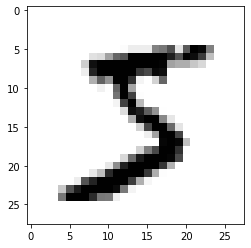

In [11]:
plt.imshow(X_train_raw[0], cmap='gray_r', interpolation='nearest')
plt.show()

### PIL Image

In [12]:
# pil_image = Image.fromarray(X_train_raw[0])
# pil_image.show()

## Preprocessing

### Numpy to Tensor

In [13]:
X_train_tensor = tf.convert_to_tensor(X_train_raw)
X_test_tensor = tf.convert_to_tensor(X_test_raw)

In [14]:
X_train_tensor.shape

TensorShape([60000, 28, 28])

### Min-Max Scaling

In [15]:
X_train_scaled, X_test_scaled = X_train_tensor/255, X_test_tensor/255

In [16]:
np.shape(X_train_scaled)

TensorShape([60000, 28, 28])

In [17]:
X_train, X_test = X_train_scaled, X_test_scaled

### One-Hot Encoding

In [26]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [27]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
np.argmax(y_train_onehot[0])

5

## Model definition

### 2-layer-NN

In [70]:
#model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(units=300, activation=activations.sigmoid),
    tf.keras.layers.Dense(units=10, activation=activations.softmax)
])

## Model Compile

In [71]:
#early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=VERBOSE, patience=PATIENCE, restore_best_weights=True)
mcp = ModelCheckpoint(SAVE_DIR+'best-model.h5', monitor='val_accuracy', mode='max', verbose=VERBOSE, save_best_only=True)

#compile
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

## Model Summary

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [73]:
history = model.fit(X_train, y_train_onehot, epochs=EPOCHS, callbacks=[es, mcp], batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
738/750 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.1298
Epoch 1: val_accuracy improved from -inf to 0.18842, saving model to ../model/2-layer-NN\best-model.h5
750/750 [==============================] - 2s 2ms/step - loss: 0.0912 - accuracy: 0.1308 - val_loss: 0.0905 - val_accuracy: 0.1884
Epoch 2/200
722/750 [===========================>..] - ETA: 0s - loss: 0.0900 - accuracy: 0.1953
Epoch 2: val_accuracy did not improve from 0.18842
750/750 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.1946 - val_loss: 0.0897 - val_accuracy: 0.1835
Epoch 3/200
735/750 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.1899
Epoch 3: val_accuracy improved from 0.18842 to 0.19050, saving model to ../model/2-layer-NN\best-model.h5
750/750 [==============================] - 1s 1ms/step - loss: 0.0893 - accuracy: 0.1897 - val_loss: 0.0891 - val_accuracy: 0.1905
Epoch 4/200
704/750 [===========================>..] - E

## Test Model

In [75]:
loaded_model = load_model(SAVE_DIR+'best-model.h5')
loss, acc = loaded_model.evaluate(X_test, y_test_onehot)

print('Test loss:', loss)
print('Test accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.8979
Test loss: 0.017692483961582184
Test accuracy: 0.8978999853134155


## Save Model

In [76]:
model_name = 'trained-model.h5'

# Save model and weights
model_path = os.path.join(SAVE_DIR, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../model/2-layer-NN/trained-model.h5 


## Evaluation

### Loss / Accuracy

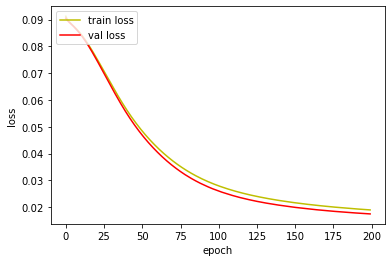

In [77]:
fig, loss_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')
plt.show()

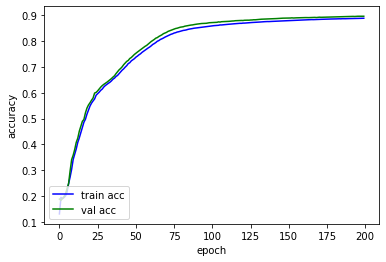

In [78]:
fig, acc_ax = plt.subplots()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='lower left')

plt.show()

In [79]:
# 동시에 plot
# fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

# loss_ax.plot(history.history['loss'], 'y', label='train loss')
# loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

# acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
# acc_ax.set_ylabel('accuracy')

# loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')

# plt.show()


### Confusion matrix

In [80]:
y_pred = loaded_model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
print(y_pred)

313/313 [==============================] - 0s 843us/step
[7 2 1 ... 4 8 6]


[[ 956    0    4    3    1    5    6    1    4    0]
 [   0 1099    2    5    1    2    4    1   21    0]
 [  13    5  886   15   16    5   21   22   38   11]
 [   4    0   22  892    1   36    5   19   21   10]
 [   1    6    6    0  898    1   14    1    9   46]
 [  17    5    7   44   22  720   22   11   37    7]
 [  19    3    5    1   12   19  892    1    6    0]
 [   4   23   29    2   14    0    0  917    4   35]
 [  10    8   10   27   14   22   18   11  837   17]
 [  13    8    7    8   48   16    1   19    7  882]]


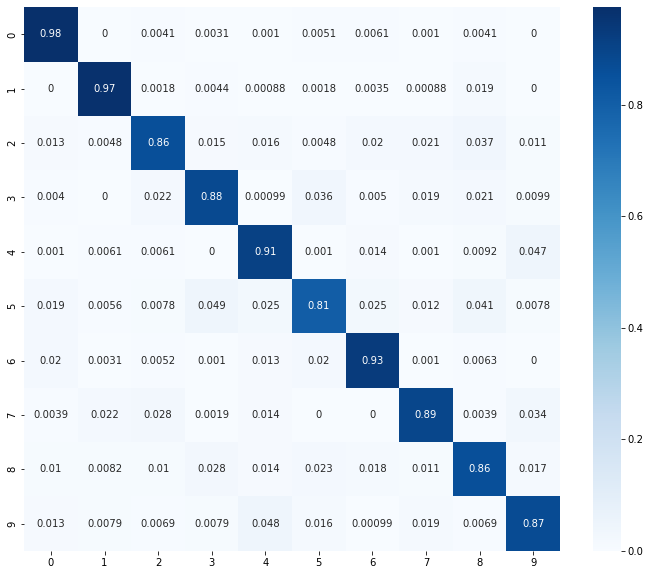

In [81]:
# constant for classes
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix/cf_matrix.sum(axis=1).reshape(10, 1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True, cmap='Blues')
plt.savefig(SAVE_DIR + 'output.png')

### precision, recall, f1 score

In [82]:
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred, average='macro')
re_score = recall_score(y_test, y_pred, average='macro')
f1_score_s = f1_score(y_test, y_pred, average='macro')
print("accuracy_score: ", acc_score)
print("precision_score: ", prec_score)
print("recall_score: ", re_score)
print("f1_score: ", f1_score_s)

accuracy_score:  0.8979
precision_score:  0.8965730308501663
recall_score:  0.8963728302735072
f1_score:  0.8961209766524117


## Load Model

In [83]:
model_name='trained-model.h5'
model_path=os.path.join(LOAD_DIR, model_name)
model=load_model(model_path)

## Predict

In [84]:
print(X_train.shape, X_train[0].shape, sep='\n')

(60000, 28, 28)
(28, 28)


In [85]:
def predict_mnist(tensor, model):
    sample=tf.reshape(tensor, [-1, 28, 28])
    result_prob=model.predict(sample, verbose=0)
    result=np.argmax(result_prob)
    print(result)

5 클래스에 대한 예측

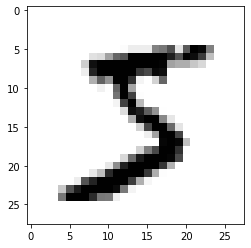

In [86]:
plt.imshow(X_train[0], cmap='gray_r', interpolation='nearest')
plt.show()

In [87]:
predict_mnist(X_train[0], model)

5


 0 클래스에 대한 예측

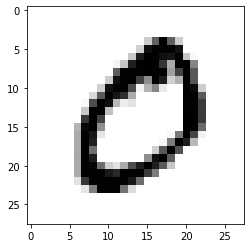

In [88]:
plt.imshow(X_train[1], cmap='gray_r', interpolation='nearest')
plt.show()

In [47]:
predict_mnist(X_train[1], model)

0
